In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram ,linkage
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
sns.set()

In [3]:
#data
url ='https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/00%20Lecture/lecture14/ML/11%20Dec%202025/DataSet/Mall_Customers.csv'
df = pd.read_csv(url)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


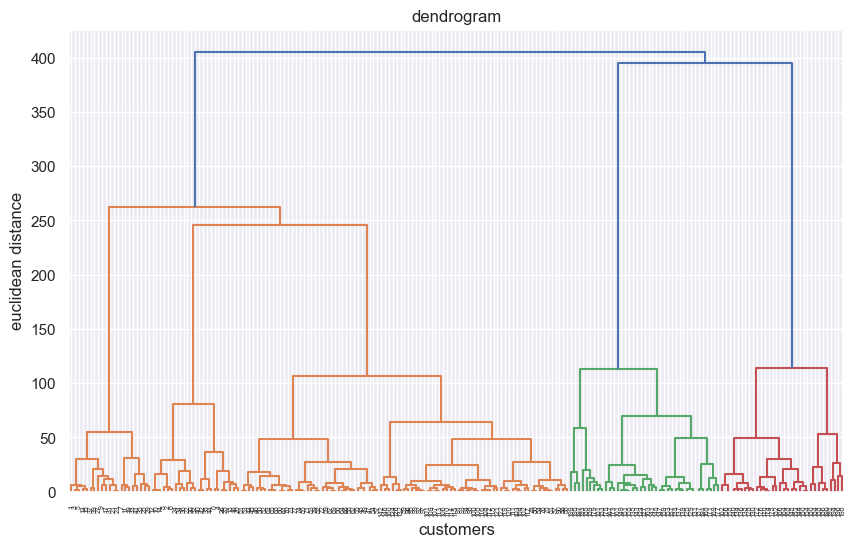

In [5]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
#dendrogram
plt.figure(figsize=(10,6))
linkage_matrix = linkage(X,method='ward')
dendrogram(linkage_matrix)
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distance')
plt.show()

In [7]:
# Apply Agglomerative Clustering
hier_cluster = AgglomerativeClustering(
    n_clusters=5,
    linkage='ward'
)
labels = hier_cluster.fit_predict(X)
df['Cluster']= labels

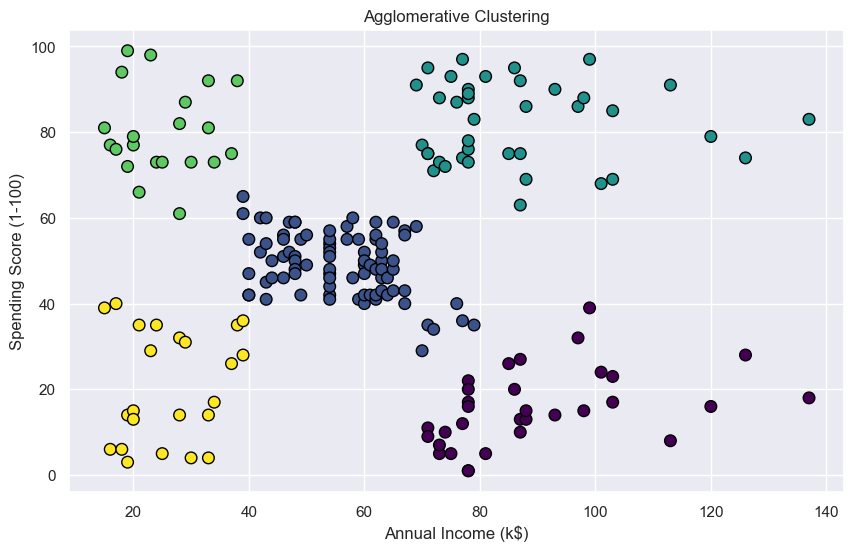

Cluster
1    85
2    39
0    32
4    23
3    21
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(10,6))
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis',
    s=70,
    edgecolor='black'
)
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
print(df['Cluster'].value_counts())